In [1]:
from utils import *

%load_ext autoreload
%autoreload 2

### Part4. 1: Embedding a periodic signal into state space ###

In [2]:
#load data
data= np.loadtxt( "takens_1.txt")
X0 = data[:, 0]

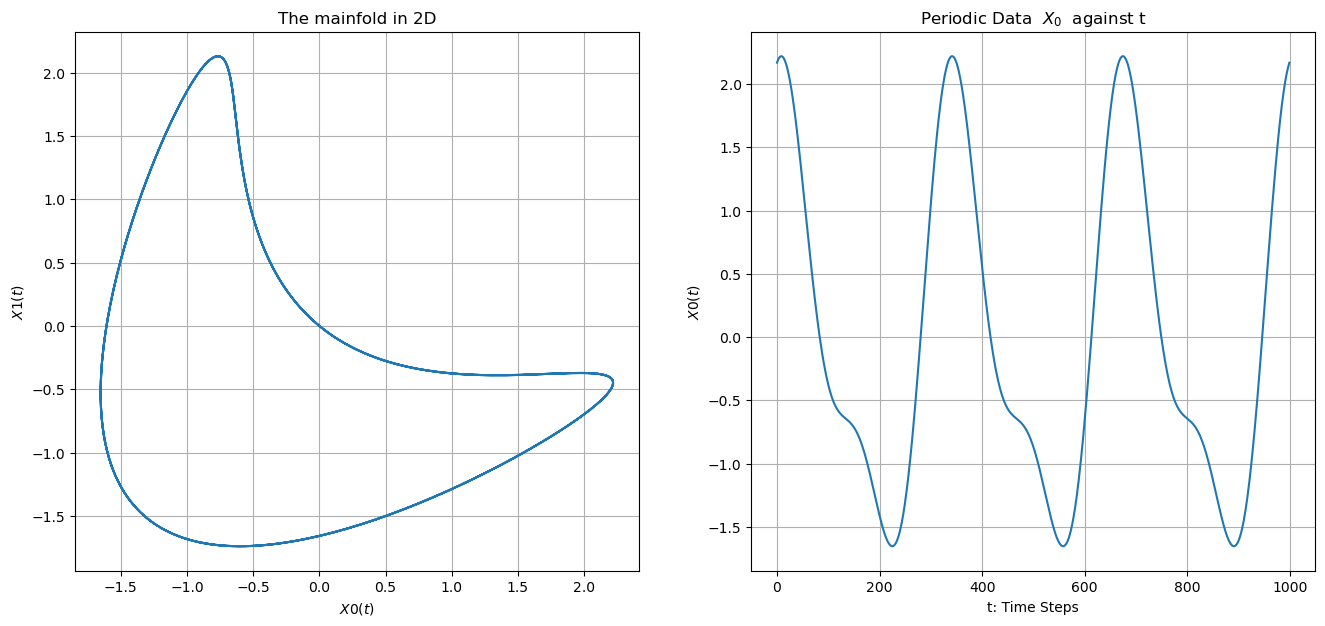

In [3]:
#plot
fig=plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plot_dataset(data,ax1,is2D=True)
plot_dataset(X0,ax2)

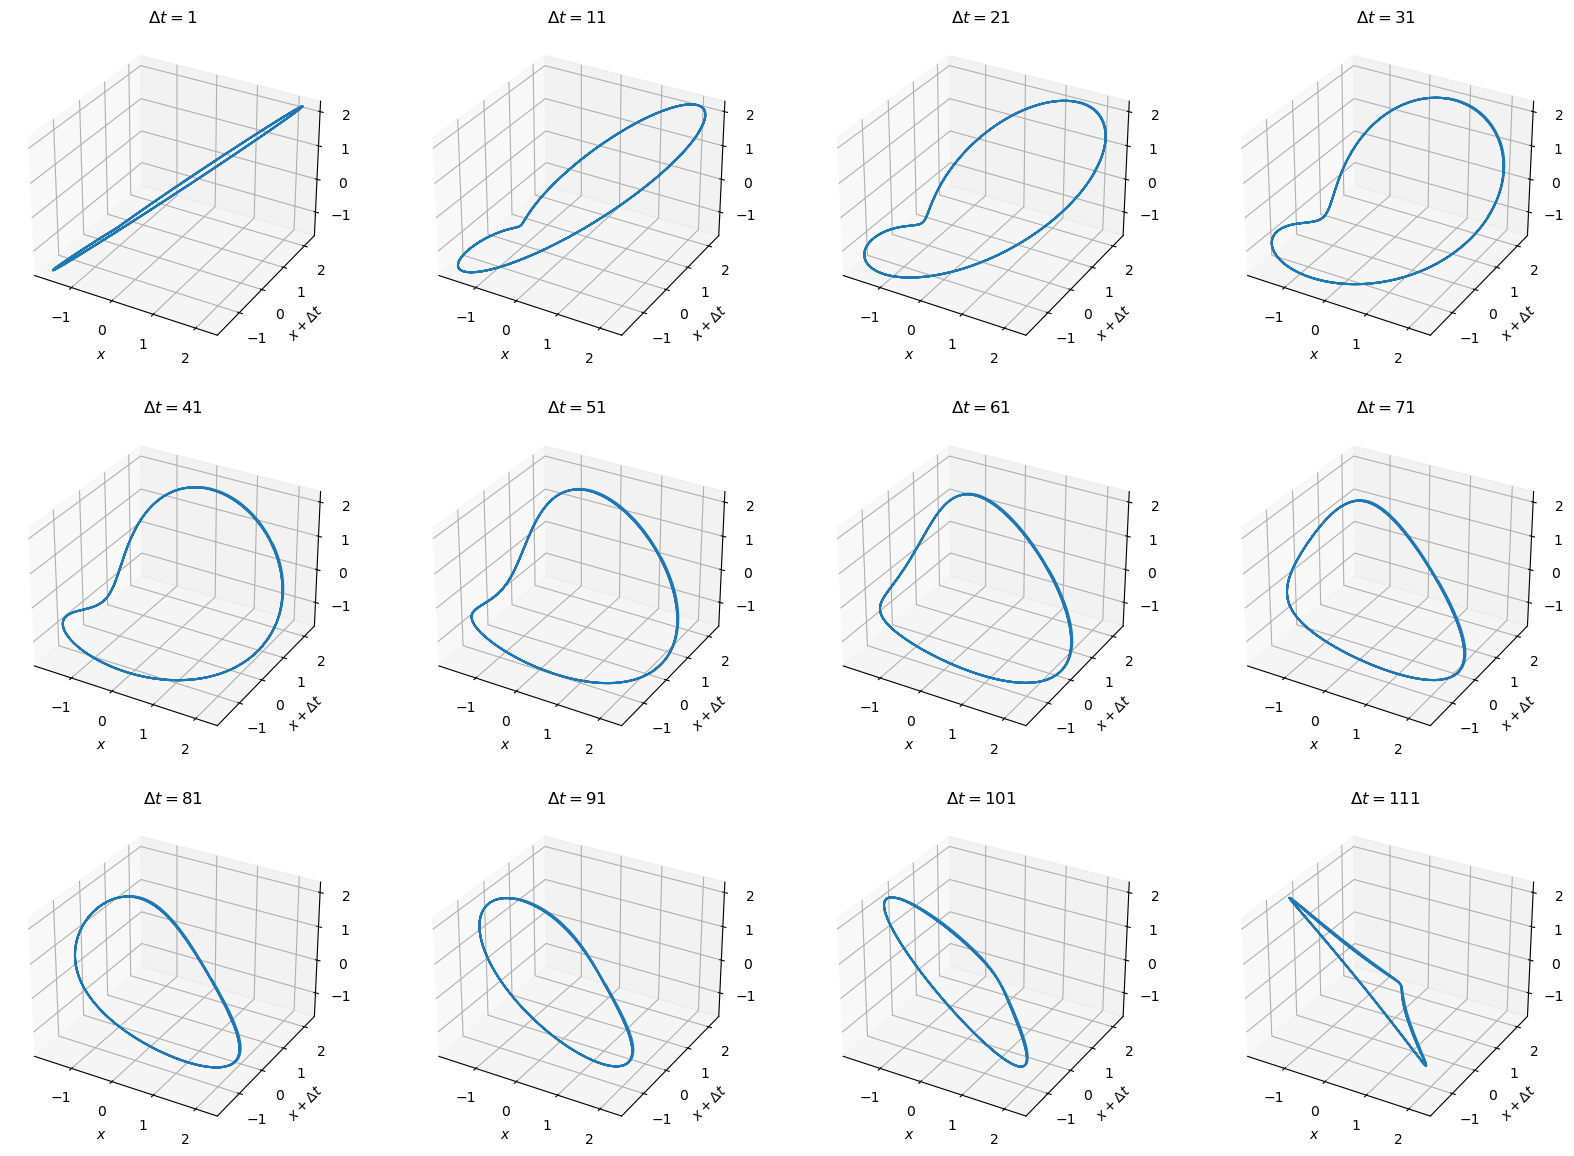

In [4]:
delta_t = np.arange(1,120,10)
plot_delayed_ver(X0, delta_t)

### Part 4.2: Approximating chaotic dynamics from a single time series ###

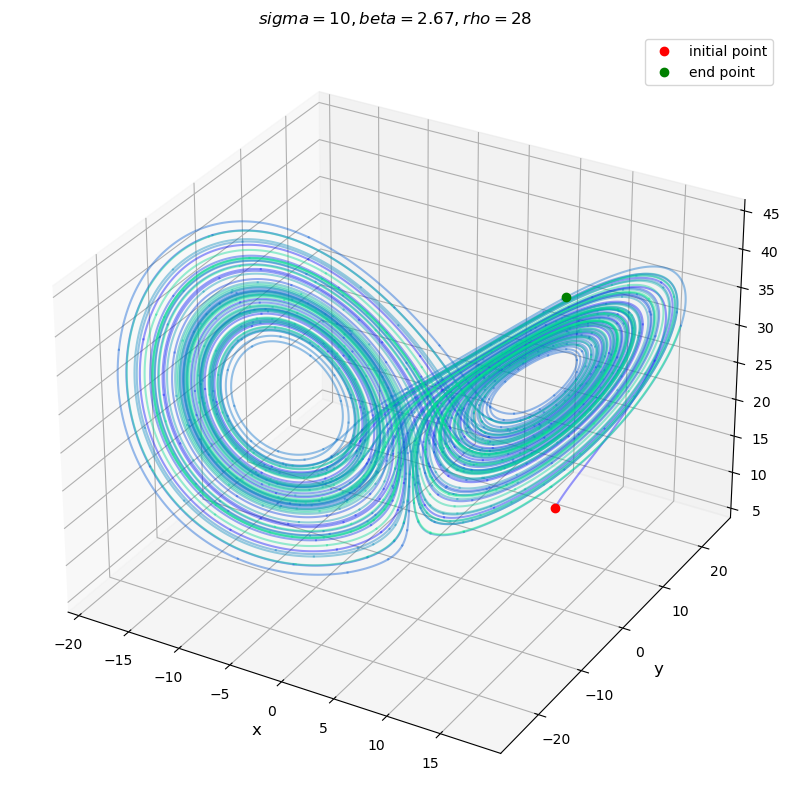

In [5]:
sigma = 10
beta = 8/3
rho = 28
X_init = [10, 10, 10]
t_end = 100

Trajc=plot_lorenz_trajectory(X_init, sigma,beta,rho,t_end)

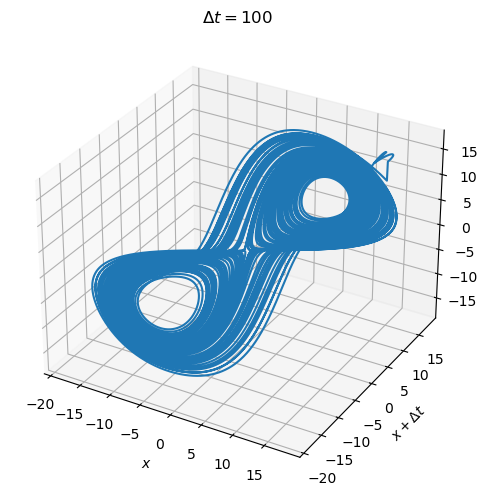

In [6]:
delta_t = 100
plot_delayed_ver_lorenz(Trajc.T, [delta_t],isZ=False)

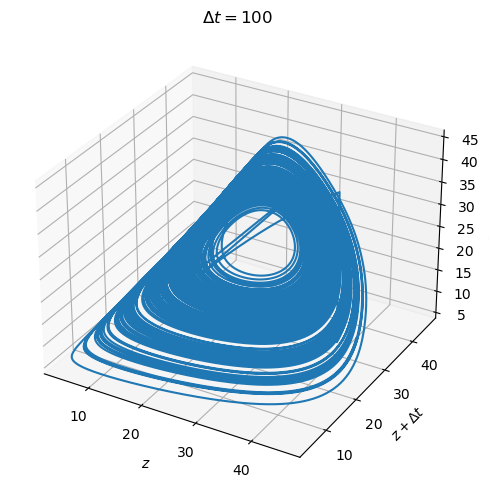

In [7]:
delta_t = 100
plot_delayed_ver_lorenz(Trajc.T, [delta_t],isZ=True)

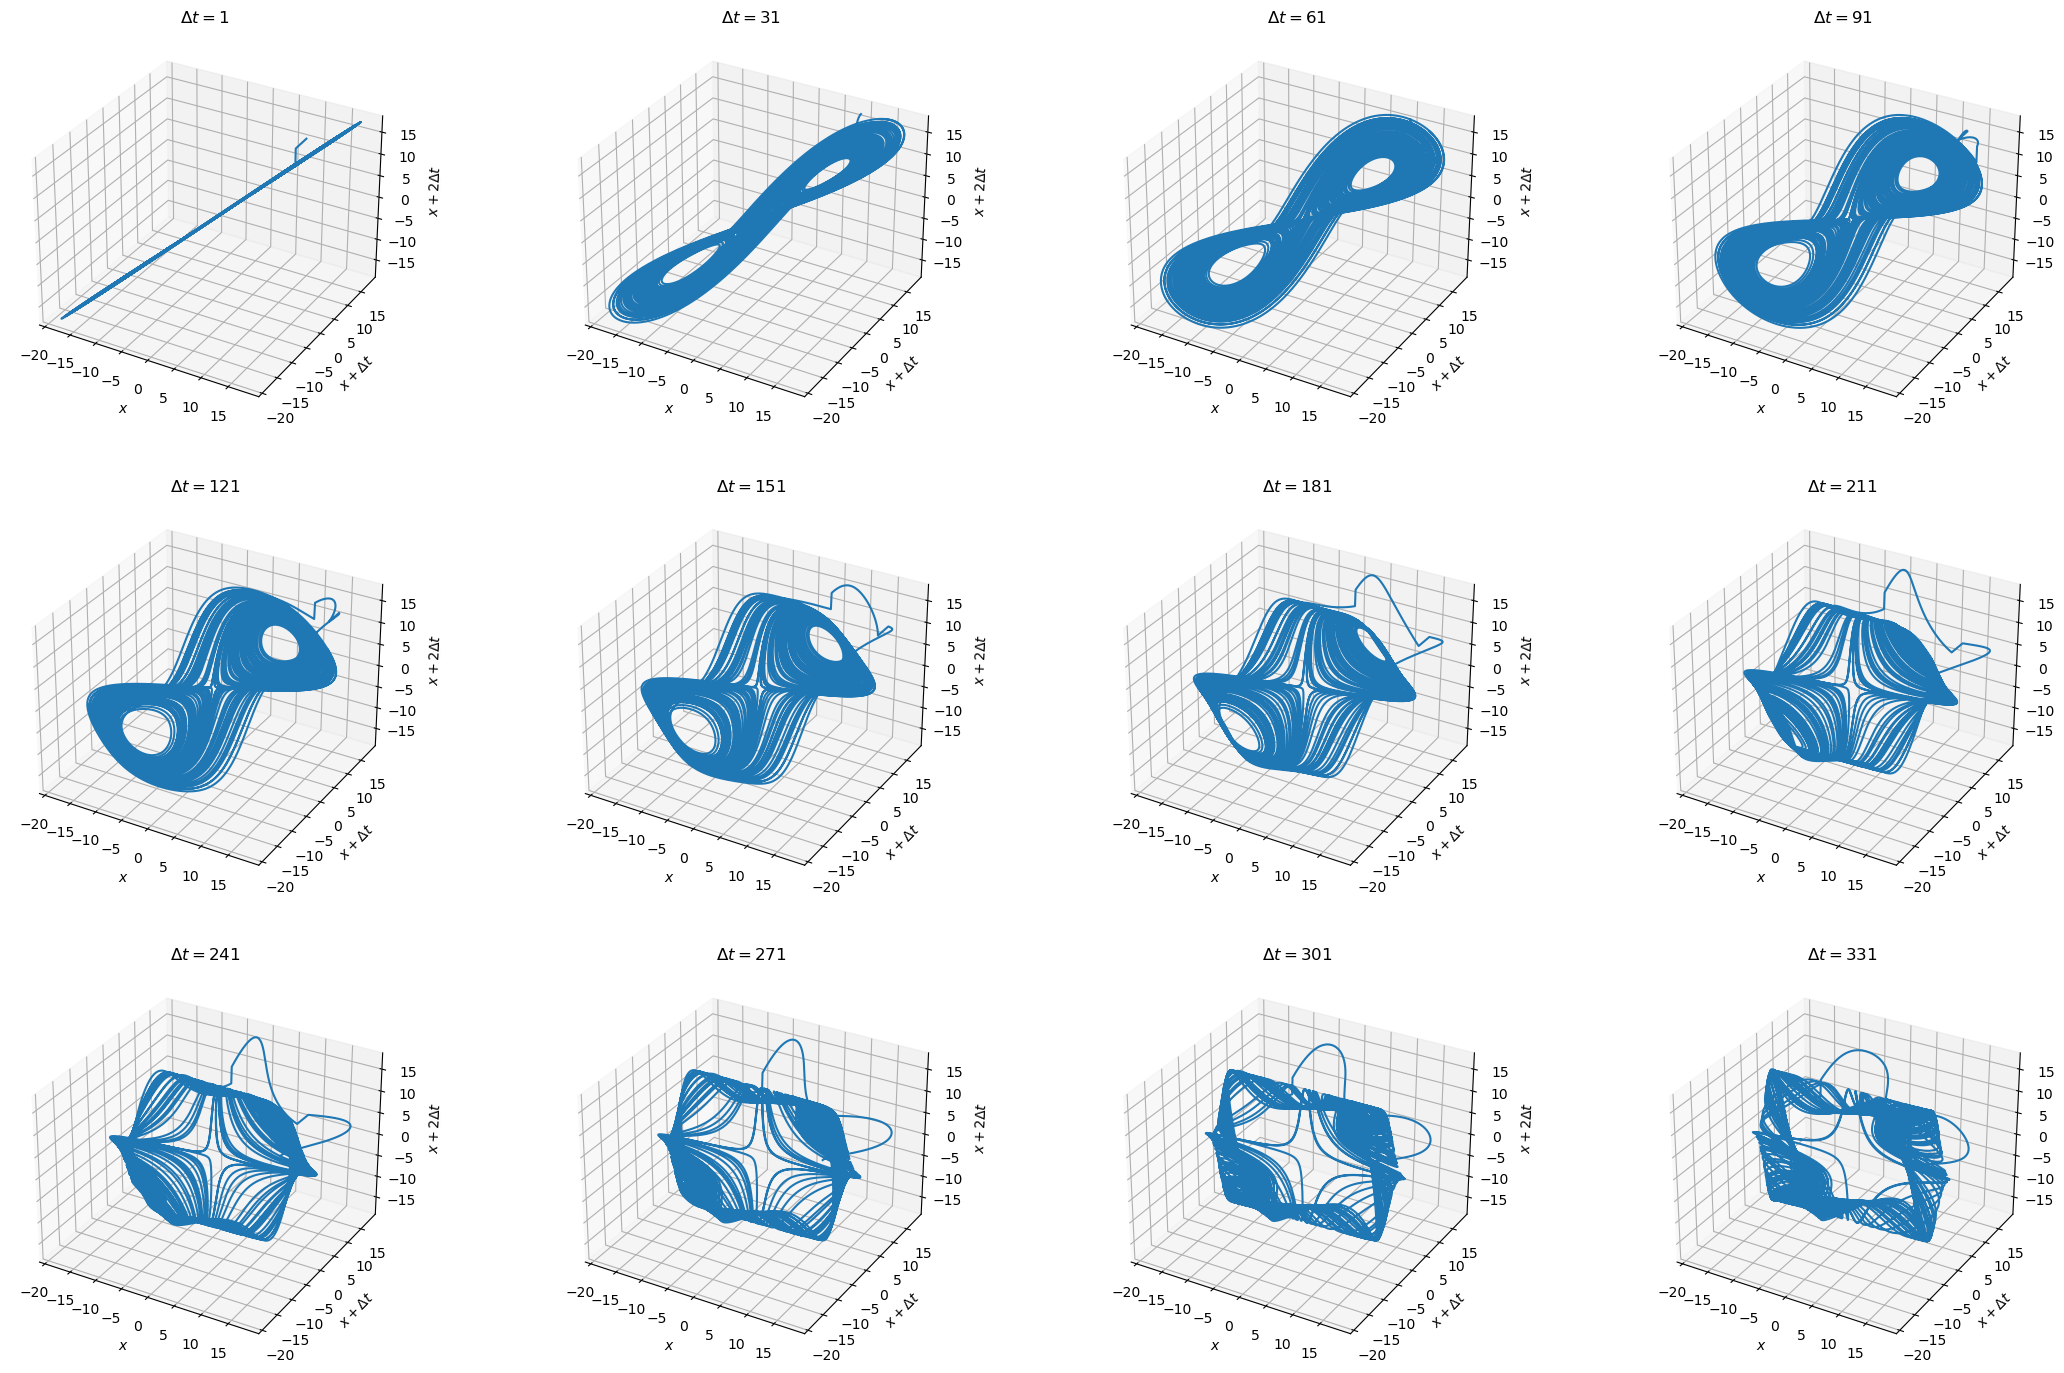

In [8]:
delta_t = np.arange(1,332,30)
plot_delayed_ver_lorenz(Trajc.T, delta_t,isZ=False)

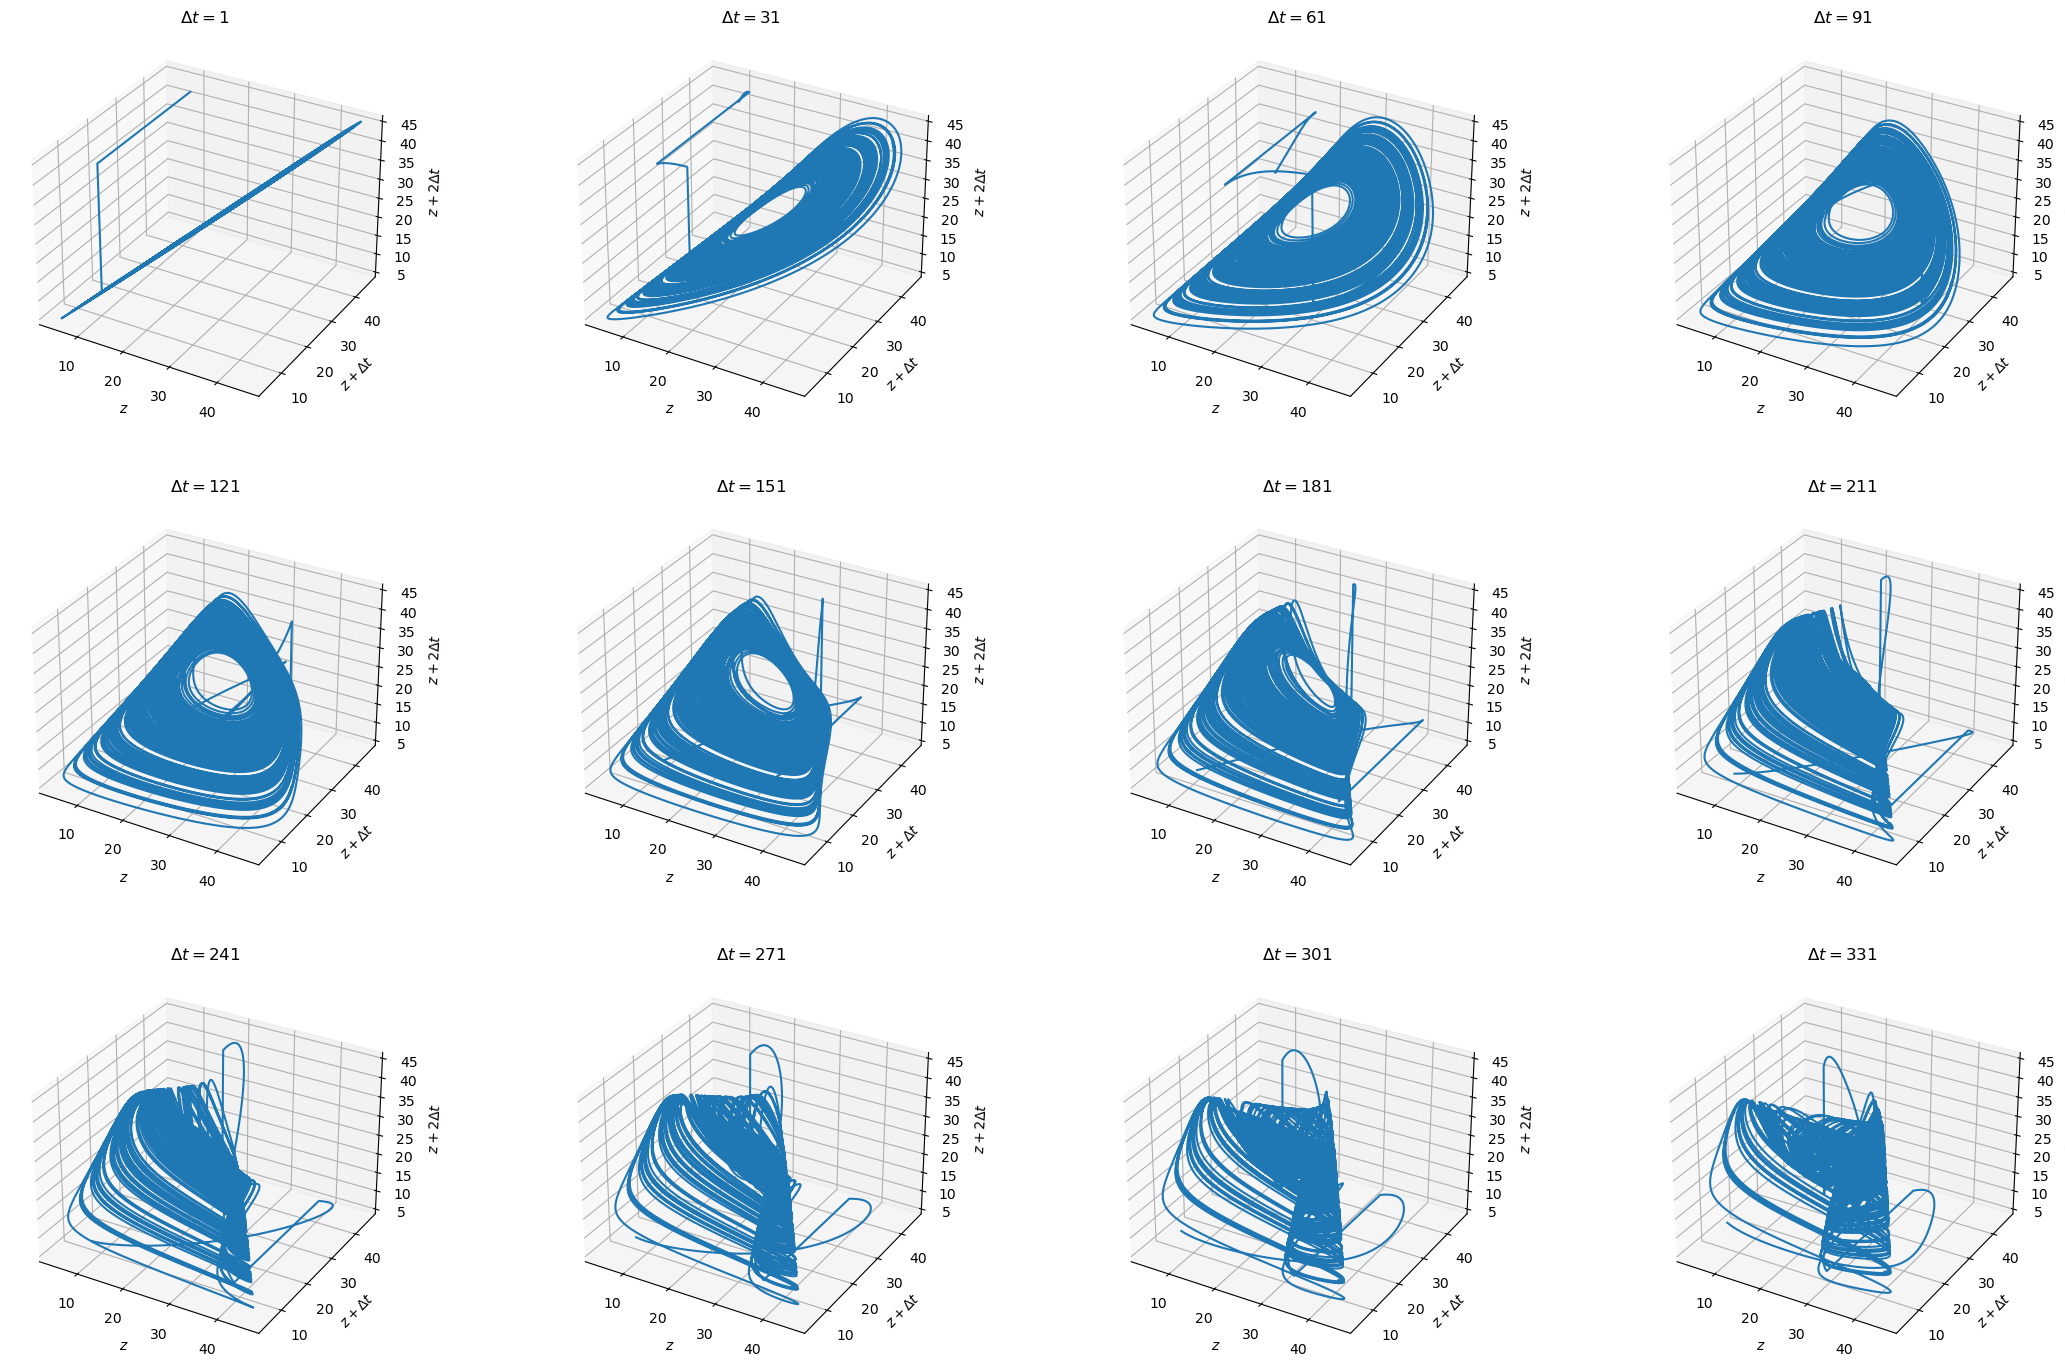

In [9]:
plot_delayed_ver_lorenz(Trajc.T, delta_t,isZ=True)

### Bonus Part ###

In [10]:
delta_t = 100
X=Trajc.T[:,0]
x = np.array([ X[:X.shape[0] - 2*delta_t],  X[delta_t:X.shape[0] - delta_t],X[2*delta_t:]]).T
L = 20j
x_0 = x[:-1]
x_1 = x[1:]
v = (x_1 - x_0) / 0.001
eps = 6
cut = 1e-5

In [11]:
x_min = x_0.min()
x_max = x_0.max() 
grid = np.mgrid[x_min:x_max:L, x_min:x_max:L, x_min:x_max:L].reshape((3, -1)).T
grid[:, [2, 1, 0]] = grid[:, [0, 1, 2]]   

In [12]:
C= radial_basis_approx(x_0, v, grid, eps, cut )

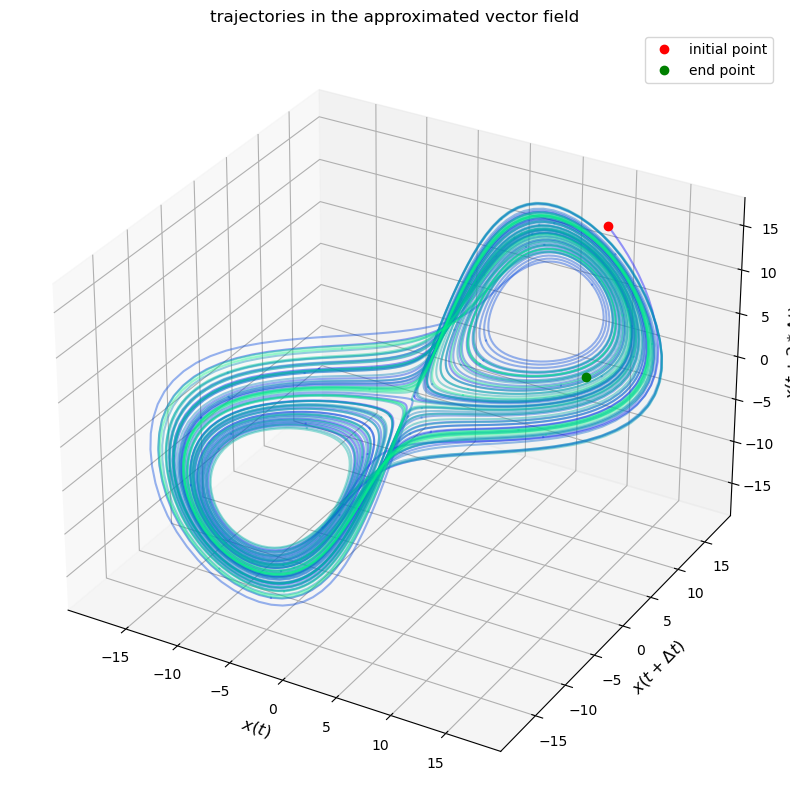

In [ ]:
T_end=100
radial_trajectory (x_0[0,:], grid, eps, C, T_end)